

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y batches = 7.

In [36]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plot
import seaborn as sns


from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier


<AxesSubplot:xlabel='Year'>

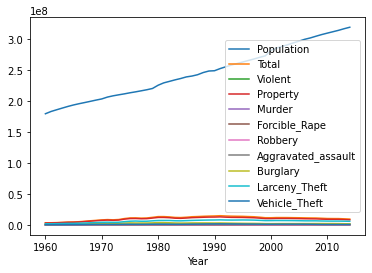

In [2]:

df = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/DS_Elsa/week9/day2/data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

### 2. Dibujar todas las columnas numéricas.


In [3]:
# Para ello primero comprobamos qué tipo de datos tiene cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1960 to 2014
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Population          55 non-null     int64
 1   Total               55 non-null     int64
 2   Violent             55 non-null     int64
 3   Property            55 non-null     int64
 4   Murder              55 non-null     int64
 5   Forcible_Rape       55 non-null     int64
 6   Robbery             55 non-null     int64
 7   Aggravated_assault  55 non-null     int64
 8   Burglary            55 non-null     int64
 9   Larceny_Theft       55 non-null     int64
 10  Vehicle_Theft       55 non-null     int64
dtypes: int64(11)
memory usage: 7.7 KB


Observamos que todas nuestras columnas son integer --> numéricas.
Para ello procedemos a dibujar columna a columna:

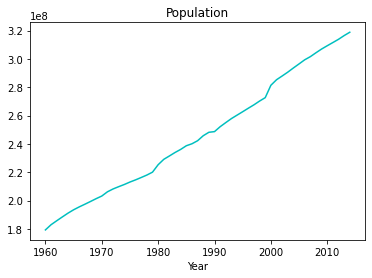

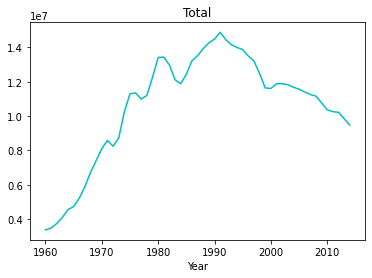

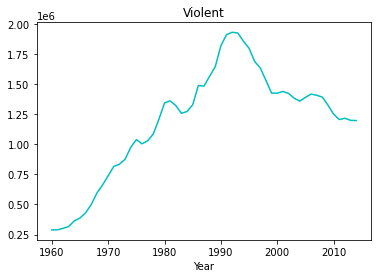

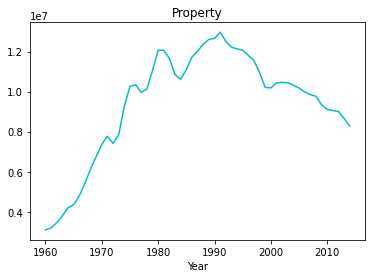

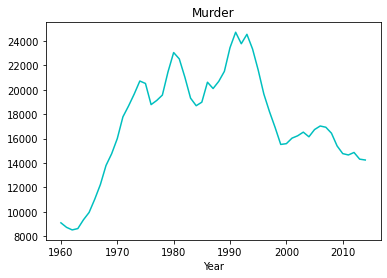

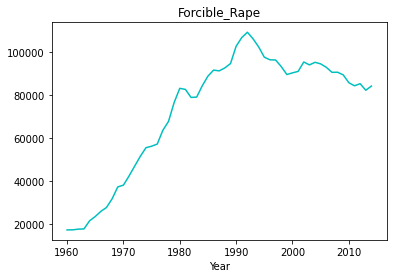

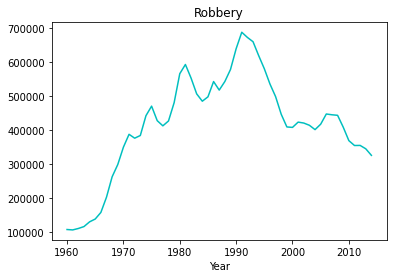

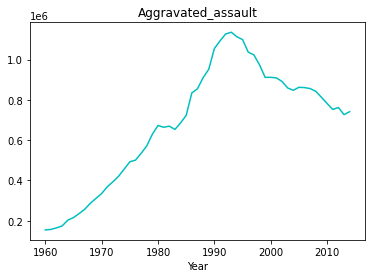

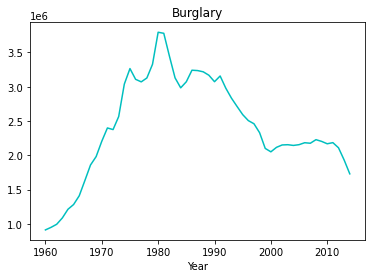

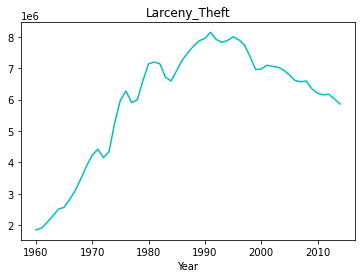

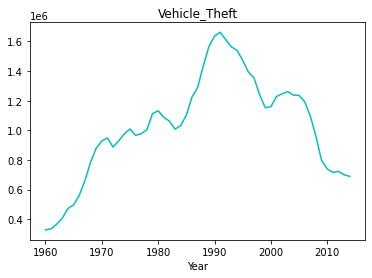

In [5]:
for elem, col in enumerate(df.columns):
    df[col].plot(fig=plt.figure(elem),color="c")
    plt.title(col)

plt.show()

### 3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas.

<AxesSubplot:xlabel='Year'>

<Figure size 432x288 with 0 Axes>

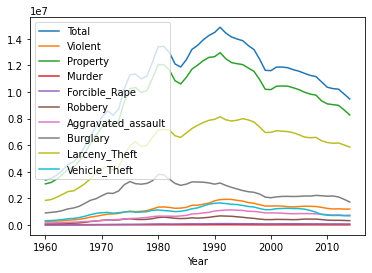

In [3]:
df1 = df.drop(["Population"],1)

df1.plot(fig=plt.figure())



<AxesSubplot:xlabel='Year'>

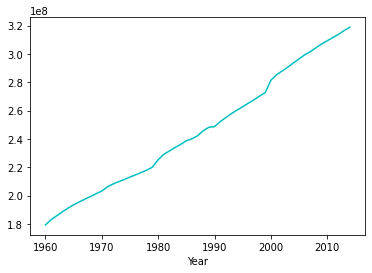

In [4]:

df2 = df.Population
df2.plot(fig=plt.figure(2),color="c")
 

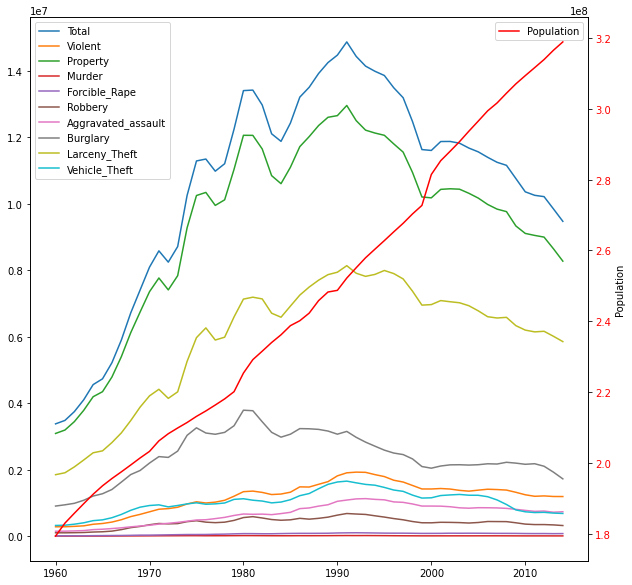

In [7]:
# Las dos gráficas juntas:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.plot(df.drop("Population", axis=1))
plt.legend(['Total', 'Violent', 'Property', 'Murder', 'Forcible_Rape',
       'Robbery', 'Aggravated_assault', 'Burglary', 'Larceny_Theft',
       'Vehicle_Theft'])

ax2 = ax1.twinx()
ax2.plot(df["Population"], 'r-')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.set_ylabel("Population")
plt.legend(["Population"], loc=0)

### 4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación?


In [8]:
del (df["Population"])
del (df["Total"])

### 5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

<AxesSubplot:>

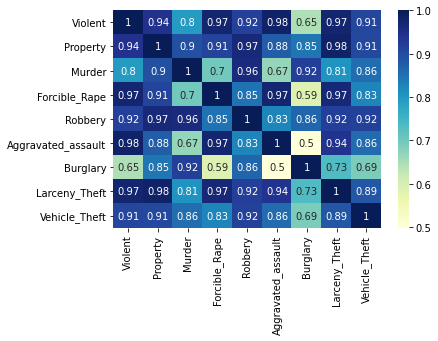

In [26]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [25]:
# Obtenemos la correlación de las 5 mejores columnas, pongo head(6), porque está incluida Murder que es con la que tenemos que correlacionar nuestro modelo.
df_murder = df.corr()
corr_murder = abs(df_murder["Murder"])
corr_murder.sort_values(ascending=False).head(6)

Murder           1.000000
Robbery          0.960156
Burglary         0.920207
Property         0.895641
Vehicle_Theft    0.856600
Larceny_Theft    0.806279
Name: Murder, dtype: float64

In [26]:
# Generamos X, y
X = df[["Robbery","Burglary","Property","Vehicle_Theft","Larceny_Theft"]].values
y = df["Murder"].values

In [27]:
X.shape

(55, 5)

In [28]:
y.shape

(55,)

In [29]:
#Dividimos el modelo, El porcentaje 80-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [52]:
# Aplicamos el modelo de polinomial
degree=6

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train, y_train)

#######

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train) # X_poly aprende lo que ha sacado de cada uno de los coeficientes del modelo
y_pred = lin_reg_model.predict(X_poly)
mae_test = mean_absolute_error(y_train, y_pred)

print("y_pred", y_pred.shape)
print("MAE Validation", mae_test)
print("Score:", r2_score(y_train, y_pred)*100, " %")

y_pred (44,)
MAE Validation 1.5828325227961283e-05
Score: 100.0  %


In [61]:
# Aplicamos validación cruzada al modelo:
# ENTRENANDO

k_fold = KFold(n_splits=23, random_state=1)
val_score = []
train_score = []
Mae_train = []
Mae_val = []
# define the model
degree=6

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train, y_train)
lin_reg_model.fit(X_poly, y_train) # X_poly aprende lo que ha sacado de cada uno de los coeficientes del modelo
y_pred = lin_reg_model.predict(X_poly)


for train, val in k_fold.split(X_train):
    # train the model
    model.fit(X_train[train], y_train[train])
    # validacion
    score_val = model.score(X_train[val], y_train[val])
    y_pred_val = lin_reg_model.predict(X_poly[val])
    mae_val = mean_absolute_error(y_train[val], y_pred_val)
    val_score.append(score_val)
    Mae_val.append(mae_val)
    # entrenamiento
    score_train = model.score(X_train[train], y_train[train])
    y_pred_train = lin_reg_model.predict(X_poly[train])
    mae_train = mean_absolute_error(y_train[train], y_pred_train)
    train_score.append(score_train)
    Mae_train.append(mae_train)
    print("____________________")
    print("Score Validation", score_val)
    print("MAE Validation", mae_val)
    print("Score entrenamiento:", score_train)
    print("MAE entrenamiento", mae_train)

    

### NO ME SALE EL SCORE DE VALIDACION QUÉ HAGO MAL, sale 0????


____________________
Score Validation 0.0
MAE Validation 1.2801450793631375e-05
Score entrenamiento: 1.0
MAE entrenamiento 1.3361791692053279e-05
____________________
Score Validation 0.0
MAE Validation 1.2530508683994412e-06
Score entrenamiento: 1.0
MAE entrenamiento 1.3684650184586644e-05
____________________
Score Validation 0.0
MAE Validation 1.5556812286376953e-05
Score entrenamiento: 1.0
MAE entrenamiento 1.292681970101382e-05
____________________
Score Validation 0.0
MAE Validation 6.259841029532254e-06
Score entrenamiento: 1.0
MAE entrenamiento 1.3582470793543117e-05
____________________
Score Validation 0.0
MAE Validation 2.872943878173828e-05
Score entrenamiento: 1.0
MAE entrenamiento 1.3554087629364359e-05
____________________
Score Validation 0.0
MAE Validation 1.5795230865478516e-05
Score entrenamiento: 1.0
MAE entrenamiento 1.4170002292043396e-05
____________________
Score Validation 0.0
MAE Validation 2.7687710826285183e-05
Score entrenamiento: 1.0
MAE entrenamiento 1.39

In [62]:
# Calculamos el total de test
X_test_poly = polinominal_model.fit_transform(X_test, y_test)
score = lin_reg_model.score(X_test_poly, y_test)


### 6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y batches = 7.

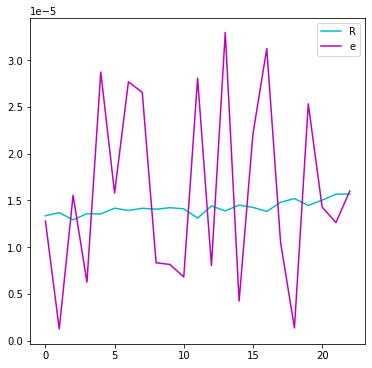

In [64]:
# Representación visual
fig = plt.figure(figsize=(6,6))
plt.plot(Mae_train, label="MAE entrenamiento", color="c")
plt.plot(Mae_val, label="MAE validacion", color="m")
plt.legend("Reprensentación de errores de validacion y entrenamiento")